In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data = sm.datasets.co2.load_pandas()
y = data.data

In [3]:
y = y['co2'].resample('MS').mean()
y = y.fillna(y.bfill())
print(y)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64


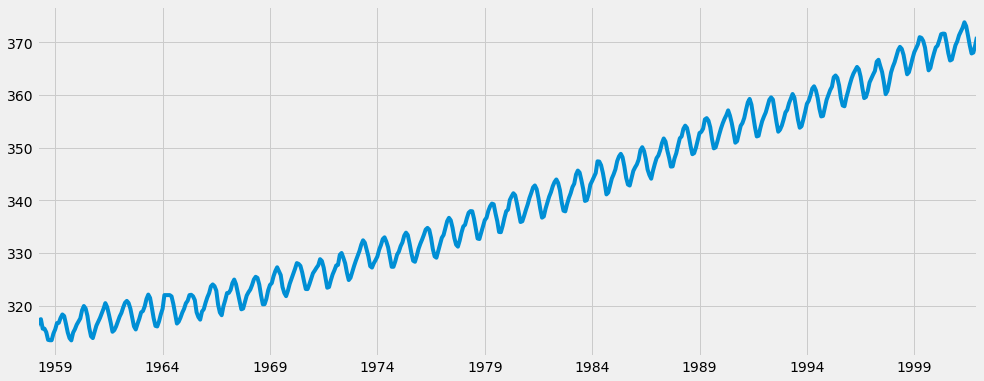

In [4]:
y.plot(figsize=(15, 6))
plt.show()

In [5]:
p = d = q = range(0,2)

In [6]:
pdq = list(itertools.product(p, d, q))

In [7]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [8]:
seasonal_pdq = [(x[0], x[1], x[2], 2880) for x in pdq]

In [9]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [10]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
warnings.filterwarnings("ignore")

In [12]:
for param in pdq:
	for param_seasonal in seasonal_pdq:
		try:
			mod = sm.tsa.statespace.SARIMAX(
				y,
				order=param,
				seasonal_order=param_seasonal,
				enforce_stationarity=False,
				enforce_invertibility=False
			)
			results = mod.fit()
			print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
		except:
			continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7612.583429881011
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.3436240339815
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1854.8282341412164
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.7111727639362
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320035
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.28787047381
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.657897806896
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647912726911
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048754600277
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662326510701
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941067346536
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.417471683094
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1087.281248981396
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:780.4314952710222
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.595789360643
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912988940489
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1675.8086923024293
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194116
ARI

In [13]:
mod = sm.tsa.statespace.SARIMAX(
    y,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = mod.fit()

In [16]:
results.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,0.3182,0.092,3.442,0.001,0.137,0.499
ma.L1,-0.6254,0.077,-8.163,0.000,-0.776,-0.475
ar.S.L12,0.0010,0.001,1.732,0.083,-0.000,0.002
ma.S.L12,-0.8769,0.026,-33.812,0.000,-0.928,-0.826
sigma2,0.0972,0.004,22.632,0.000,0.089,0.106


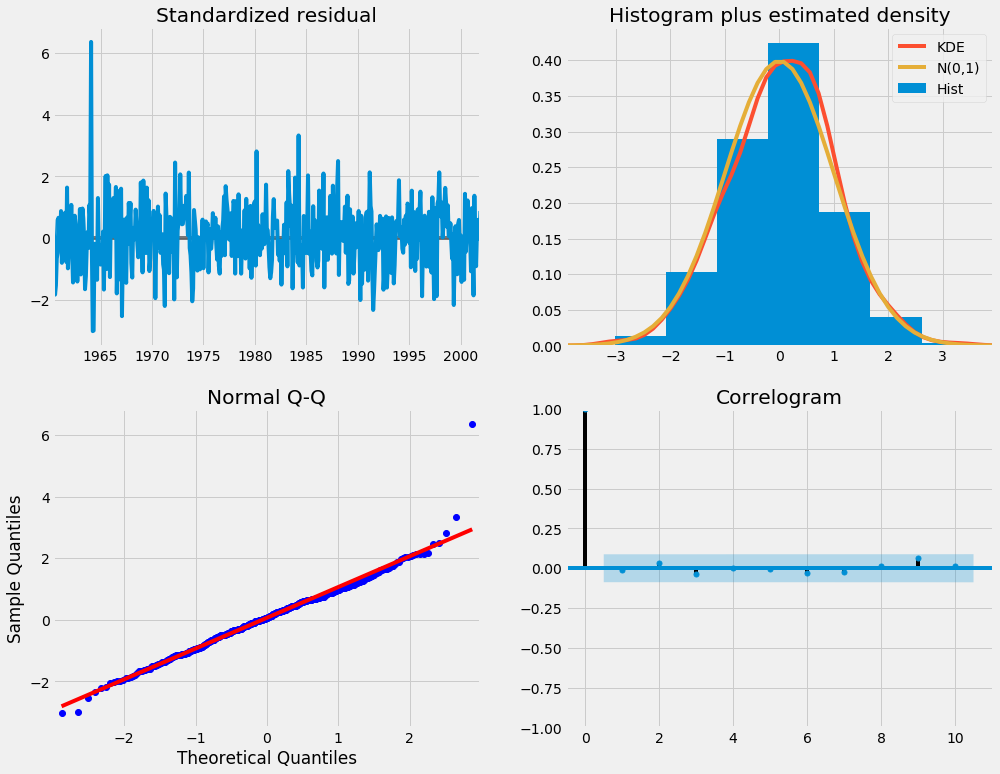

In [17]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()